### aim: look at MEDUSA files, what do they tell us about carbon cycle response

### date: Dec 12, 2022

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## Code to list keys, to know how big file is, to know longnames

In [4]:
import os

tw = '/gpfs/home/mep22dku/scratch/MEDUSA/*/medusa_cj198o_1m_19900101-19900201_diad-T.nc'
t = glob.glob(tw)
print(t)
q = os.stat(t[0])
print(q.st_size* 0.000001) #MB
w = nc.Dataset(t[0], "a")
#print(w)
w = xr.open_dataset(t[0])
tvars = list(w.keys())
# w['CO2FLUX']
print(tvars)

printlong = False
if printlong:
    
    for i in range(0,len(tvars)):
        print([tvars[i]])

        try:
            print(w[tvars[i]].long_name)
        except:
            print('*** no longname')

        print()


['/gpfs/home/mep22dku/scratch/MEDUSA/cj198_1990/medusa_cj198o_1m_19900101-19900201_diad-T.nc']
423.121924
['bounds_lon', 'bounds_lat', 'area', 'deptht_bounds', 'thkcello', 'time_centered_bounds', 'INVTN', 'INVTSI', 'INVTFE', 'PRN', 'MPN', 'PRD', 'MPD', 'OPAL', 'OPALDISS', 'GMIPn', 'GMID', 'MZMI', 'GMEPN', 'GMEPD', 'GMEZMI', 'GMED', 'MZME', 'DETN', 'MDET', 'AEOLIAN', 'BENTHIC', 'SCAVENGE', 'PN_JLIM', 'PN_NLIM', 'PN_FELIM', 'PD_JLIM', 'PD_NLIM', 'PD_FELIM', 'PD_SILIM', 'PDSILIM2', 'SDT__100', 'SDT__200', 'SDT__500', 'SDT_1000', 'TOTREG_N', 'TOTRG_SI', 'REG__100', 'REG__200', 'REG__500', 'REG_1000', 'FASTN', 'FASTSI', 'FASTFE', 'FASTC', 'FASTCA', 'FDT__100', 'FDT__200', 'FDT__500', 'FDT_1000', 'RG__100F', 'RG__200F', 'RG__500F', 'RG_1000F', 'FDS__100', 'FDS__200', 'FDS__500', 'FDS_1000', 'RGS_100F', 'RGS_200F', 'RGS_500F', 'RGS1000F', 'REMINN', 'REMINSI', 'REMINFE', 'SEAFLRN', 'SEAFLRSI', 'SEAFLRFE', 'SEAFLRC', 'SEAFLRCA', 'MED_QSR', 'MED_XPAR', 'INTFLX_N', 'INTFLX_SI', 'INTFLX_FE', 'INT_

In [5]:
# my_string="hello python world , i'm a beginner"
# print(my_string.split("world",1)[1])

In [6]:
# cond =  ((v_name == 'bounds_lon') | \
#  (v_name == 'bounds_lat') | \
#  (v_name == 'area') | \
#  (v_name == 'deptht_bounds') | \
#  (v_name == 'thkcello') | \

#  (v_name == 'WIND') | \
#  (v_name == 'ATM_PCO2') | \
#  (v_name == 'OCN_PCO2') | \
#  (v_name == 'CO2FLUX') | \
#  (v_name == 'TCO2') | \
#  (v_name == 'TALK') | \
#  (v_name == 'C_CONS') | \
#  (v_name == 'CHL_MLD') | \
#  (v_name == 'TPP3'))


In [7]:
q

os.stat_result(st_mode=33188, st_ino=438146416, st_dev=41, st_nlink=1, st_uid=11575, st_gid=503, st_size=423121924, st_atime=1671693517, st_mtime=1671693517, st_ctime=1671693517)

## hardwon way to copy over variables

In [8]:
# bdir = '/gpfs/home/mep22dku/scratch/MEDUSA/'
# tardir = 'cj198_1990/'
# tstr = f'{bdir}{tardir}/*diad-T.nc'
# print(tardir)
# q = glob.glob(tstr)
# print(len(q))
# for i in range(0,len(q)):
#     print(i)
#     dsin = nc.Dataset(q[i])
#     justfil = (q[i].split(tardir,1)[1])
#     newfil = justfil.replace("diad-T", "diad-T_SUBSET")
#     newfilhome = f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/{newfil}'
#     dsout = nc.Dataset(newfilhome, "w", format="NETCDF4")
#     #Copy dimensions
#     for dname, the_dim in dsin.dimensions.items():
#         dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

#     # Copy variables
#     for v_name, varin in dsin.variables.items():
#         # print(v_name)
#         cond =  ((v_name == 'bounds_lon') | \
#              (v_name == 'bounds_lat') | \
#              (v_name == 'nav_lon') | \
#              (v_name == 'nav_lat') | \
#              (v_name == 'area') | \
#              (v_name == 'deptht_bounds') | \
#              (v_name == 'thkcello') | \

#              (v_name == 'WIND') | \
#              (v_name == 'ATM_PCO2') | \
#              (v_name == 'OCN_PCO2') | \
#              (v_name == 'CO2FLUX') | \
#              (v_name == 'TCO2') | \
#              (v_name == 'TALK') | \
#              (v_name == 'C_CONS') | \
#              (v_name == 'CHL_MLD') | \
#              (v_name == 'TPP3'))
#         #print(cond)
#         # cond = (v_name == 'WIND')
    
#         if cond:
#             outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
#             outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
#             outVar[:] = varin[:]
#             # print('--')
#             # print(f'**{v_name}**')
#             # print('--')
#         #print()
#     dsout.close()

# print('done')

In [9]:
bdir = '/gpfs/data/greenocean/software/resources/medusa/'
#'cj198_1950','cj198_1960','cj198_1970',
#done: 'cj198_2000' 'cj198_2010','cj200_1990/','cj200_2000',
tardirs = [\
          'cj200_2010']


for t in range(0,len(tardirs)):
    tardir = tardirs[t]
    print(tardir)
    tstr = f'{bdir}{tardir}/*diad-T.nc'
    q = glob.glob(tstr)
    print(len(q))
    for i in range(0,len(q)):
        print(i)
        dsin = nc.Dataset(q[i])
        justfil = (q[i].split(tardir,1)[1])
        newfil = justfil.replace("diad-T", "diad-T_SUBSET")
        newfilhome = f'/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/{newfil}'
        #print(newfilhome)
        dsout = nc.Dataset(newfilhome, "w", format="NETCDF4")
        #Copy dimensions
        for dname, the_dim in dsin.dimensions.items():
            dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

        # Copy variables
        for v_name, varin in dsin.variables.items():
            # print(v_name)
            cond =  ((v_name == 'bounds_lon') | \
                 (v_name == 'bounds_lat') | \
                 (v_name == 'nav_lon') | \
                 (v_name == 'nav_lat') | \
                 (v_name == 'area') | \
                 (v_name == 'deptht_bounds') | \
                 (v_name == 'thkcello') | \

                 (v_name == 'WIND') | \
                 (v_name == 'ATM_PCO2') | \
                 (v_name == 'OCN_PCO2') | \
                 (v_name == 'CO2FLUX') | \
                 (v_name == 'TCO2') | \
                 (v_name == 'TALK') | \
                 (v_name == 'C_CONS') | \
                 (v_name == 'CHL_MLD') | \
                 (v_name == 'TPP3'))
            #print(cond)
            # cond = (v_name == 'WIND')

            if cond:
                outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
                outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
                outVar[:] = varin[:]
                # print('--')
                # print(f'**{v_name}**')
                # print('--')
            #print()
        dsout.close()

cj200_2010
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


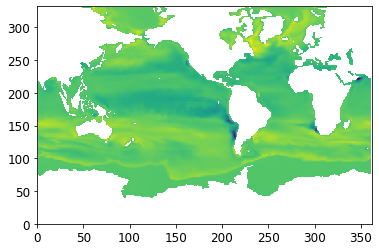

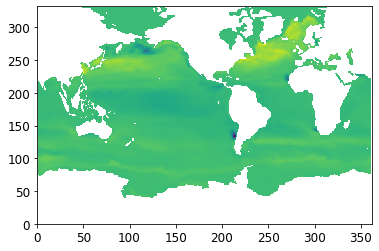

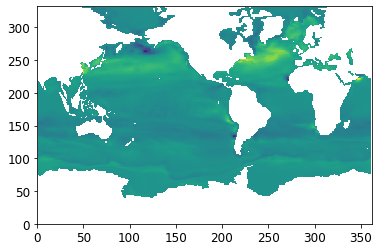

In [13]:
w = xr.open_dataset('/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/medusa_cj198o_1m_19990801-19990901_diad-T_SUBSET.nc')
# w = xr.open_dataset('/gpfs/home/mep22dku/scratch/MEDUSA/TEST/medusa_cj198o_1m_19941201-19950101_diad-T_SUBSET.nc')
plt.figure()
tw = w['CO2FLUX'][0,:,:]
plt.pcolormesh(w['CO2FLUX'][0,:,:])


w = xr.open_dataset('/gpfs/home/mep22dku/scratch/MEDUSA/SUBSET/medusa_cj198o_1m_19970101-19970201_diad-T_SUBSET.nc')
# w = xr.open_dataset('/gpfs/home/mep22dku/scratch/MEDUSA/TEST/medusa_cj198o_1m_19941201-19950101_diad-T_SUBSET.nc')
plt.figure()
plt.pcolormesh(w['CO2FLUX'][0,:,:])
tw2 = w['CO2FLUX'][0,:,:]

plt.figure()
plt.pcolormesh(tw2-tw)


In [11]:
orig = '/gpfs/home/mep22dku/scratch/MEDUSA/cj198_1990/medusa_cj198o_1m_19941201-19950101_diad-T.nc'
dest = '/gpfs/home/mep22dku/scratch/MEDUSA/TEST/medusa_cj198o_1m_19941201-19950101_diad-T_SUBSET1.nc'

import netCDF4 as nc
import numpy as np
toexclude = ['qtrSF6', 'qintSF6']
# with nc.Dataset(orig) as src, nc.Dataset(dest, "w") as dst:
#     # copy attributes
#     for name in src.ncattrs():
#         dst.setncattr(name, src.getncattr(name))
#     # copy dimensions
#     for name, dimension in src.dimensions.iteritems():
#         dst.createDimension(
#             name, (len(dimension) if not dimension.isunlimited else None))
#     # copy all file data except for the excluded
#     for name, variable in src.variables.iteritems():
#         if name not in toexclude:
#             x = dst.createVariable(name, variable.datatype, variable.dimensions)
#             dst.variables[name][:] = src.variables[name][:]
            

import netCDF4 as nc
#toexclude = ['ExcludeVar1', 'ExcludeVar2']

with nc.Dataset(orig) as src, nc.Dataset(dest, "w") as dst:
    # copy global attributes all at once via dictionary
    dst.setncatts(src.__dict__)
    # copy dimensions
    for name, dimension in src.dimensions.items():
        dst.createDimension(
            name, (len(dimension) if not dimension.isunlimited() else None))
    # copy all file data except for the excluded
    for name, variable in src.variables.items():
        if name not in toexclude:
            x = dst.createVariable(name, variable.datatype, variable.dimensions)
            dst[name][:] = src[name][:]
            # copy variable attributes all at once via dictionary
            dst[name].setncatts(src[name].__dict__)

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 47798882719872:
  #000: H5A.c line 619 in H5Awrite(): null attribute buffer
    major: Invalid arguments to routine
    minor: Bad value


RuntimeError: NetCDF: Can't open HDF5 attribute

In [ ]:
## copying code https://github.com/SalishSeaCast/analysis_tereza/blob/master/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/make_jdf_pi_bcs.ipynb

tw = '/gpfs/home/mep22dku/scratch/MEDUSA/*/medusa_cj198o_1m_19900101-19900201_diad-T.nc'
t = glob.glob(tw)
print(t)
q = os.stat(t[0])
print(q.st_size* 0.000001) #MB
dsin = nc.Dataset(t[0], "a")#



print(t[0])
q = t[0].replace("diad-T", "diad-T-subset8")
print(q)
dsout = nc.Dataset(q, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

# Copy variables
for v_name, varin in dsin.variables.items():
    #print(v_name)
    if cond:
        outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
        outVar[:] = varin[:]
# 
dsout.close()

In [ ]:
w = xr.open_dataset('/gpfs/home/mep22dku/scratch/MEDUSA/cj198_1990/medusa_cj198o_1m_19900101-19900201_diad-T.nc')
print(w)

In [ ]:
import h5py
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'
tin = '/gpfs/home/mep22dku/scratch/MEDUSA/cj198_1990/medusa_cj198o_1m_19900101-19900201_diad-T.nc'
tout = '/gpfs/home/mep22dku/scratch/MEDUSA/cj198_1990/medusa_cj198o_1m_19900101-19900201_diad-T-subset7.nc'


#Here's what I just used and worked. @arne's answer updated for Python 3 and also to include copying variable attributes:

# import netCDF4 as nc
toexclude = ['OCN_PH', 'OCN_PCO2']

with nc.Dataset(tin) as src, nc.Dataset(tout, "w") as dst:
    # copy global attributes all at once via dictionary
    print('fuck')
    dst.setncatts(src.__dict__)
    # copy dimensions
    for name, dimension in src.dimensions.items():
        dst.createDimension(
            name, (len(dimension) if not dimension.isunlimited() else None))
    # copy all file data except for the excluded
    for name, variable in src.variables.items():
        if name not in toexclude:
            x = dst.createVariable(name, variable.datatype, variable.dimensions)
            dst[name][:] = src[name][:]
            # copy variable attributes all at once via dictionary
            dst[name].setncatts(src[name].__dict__)

In [ ]:
tlist = []
for i in range(1950,2015):
    for m in range(1,13):
        if m < 10:
            tm = f'0{m}'
        if m >= 10:
            tm = f'{m}'
        w = glob.glob(f'/gpfs/home/mep22dku/scratch/MEDUSA/*/medusa_cj198o_1m_{i}*{tm}01-*diad-T.nc')
        tlist.append((w[0]))
        
    

In [ ]:
from datetime import datetime, timedelta
w = []
w2 = []
for i in range(0, len(tlist)):
    tw = xr.open_dataset(tlist[i])

    print(len(tlist))
    q = ((tw['CO2FLUX'].time_centered.values))
    print(q[0])
    td = datetime.strptime(str(q[0]),'%Y-%m-%d %H:%M:%S')

    w.append(td)
    w2.append(2)

In [ ]:
tw = '/gpfs/home/mep22dku/scratch/MEDUSA/test_cj198/medusa_cj198o_1m_19500101-19500201_diad-T.nc'
w = xr.open_dataset(tw)
w['CO2FLUX']